Módulo: Estatística com Python<br>
Lista: População e amostragem<br>
Data: 11/2021

# Exercícios - Séries Temporais

### Questão 1

Utilizando o _dataset_ `covid_saopaulo.csv`, plote o gráfico do número de casos de COVID em SP e a média móvel dos últimos 15 dias.

### Resolução:

In [1]:
# Importação do Pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregando o DataFrame
df_covid = pd.read_csv('covid_saopaulo.csv')
df_covid.head(3)

,date,confirmed,deaths
0,2020-02-26,0,0
1,2020-02-27,0,0
2,2020-02-28,1,0


In [3]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       302 non-null    object
 1   confirmed  302 non-null    int64 
 2   deaths     302 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [4]:
# Ajustando o DF para trabalhar com séries temporais
df_covid['date'] = pd.to_datetime(df_covid['date']) # converte para formato datetime
df_covid = df_covid.set_index('date') # coloca date como index do DF
df_covid.head(3)

,confirmed,deaths
date,,
2020-02-26,0,0
2020-02-27,0,0
2020-02-28,1,0


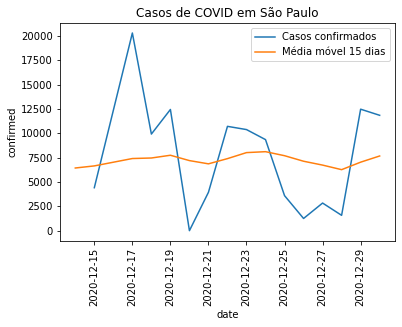

In [5]:
# Plot do número de casos dos últimos 15 e média móvel de 15 dias
sns.lineplot(data=df_covid['confirmed'].tail(15), label='Casos confirmados')
sns.lineplot(data=df_covid['confirmed'].tail(30).rolling(15).mean(), label="Média móvel 15 dias")
plt.xticks(rotation=90)
plt.title('Casos de COVID em São Paulo')
plt.legend();

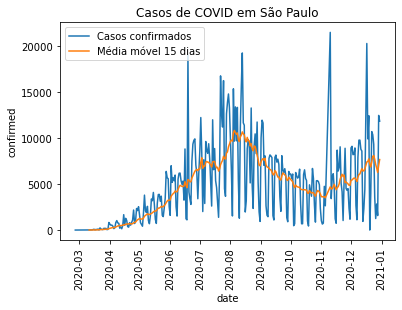

In [6]:
# Extra: olhando a evolução dos casos e média móvel
sns.lineplot(data=df_covid['confirmed'], label='Casos confirmados')
sns.lineplot(data=df_covid['confirmed'].rolling(15).mean(), label="Média móvel 15 dias")
plt.xticks(rotation=90)
plt.title('Casos de COVID em São Paulo')
plt.legend();

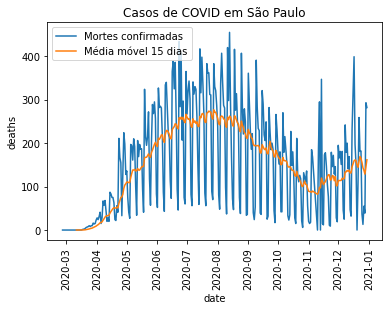

In [7]:
# Extra: olhando a evolução dos mortes e média móvel
sns.lineplot(data=df_covid['deaths'], label='Mortes confirmadas')
sns.lineplot(data=df_covid['deaths'].rolling(15).mean(), label="Média móvel 15 dias")
plt.xticks(rotation=90)
plt.title('Casos de COVID em São Paulo')
plt.legend();

### Questão 2

Ainda utilizando o _dataset_ `covid_saopaulo.csv`, agora para os casos de óbitos por COVID em SP, define as componentes da série temporal (sazonalidade, tendência, resíduo).

### Resolução:

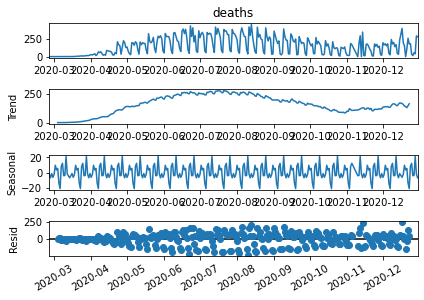

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# faz a decomposição, com o parâmetro 
comps = seasonal_decompose(df_covid['deaths'], period=15)

# plot as componentes
comps.plot()
plt.xticks(rotation=30)
plt.show()

### Questão 3

Plote o gráfico da série temporal e defina as componentes para o _dataset_ `airline_passengers.csv`, dado que para o caso deste _dataset_ temos como período mensal e sazonalidade multiplicativa.

### Resolução:

In [9]:
df_airline = pd.read_csv('airline_passengers.csv')
df_airline.head(3)

,Mês,Milhares de passageiros
0,1949-01,112
1,1949-02,118
2,1949-03,132


In [10]:
df_airline['Mês'] = pd.to_datetime(df_airline['Mês'])

In [11]:
df_airline = df_airline.set_index('Mês')
df_airline.head(3),df_airline.tail(3) 

(            Milhares de passageiros
 Mês                                
 1949-01-01                      112
 1949-02-01                      118
 1949-03-01                      132,
             Milhares de passageiros
 Mês                                
 1960-10-01                      461
 1960-11-01                      390
 1960-12-01                      432)

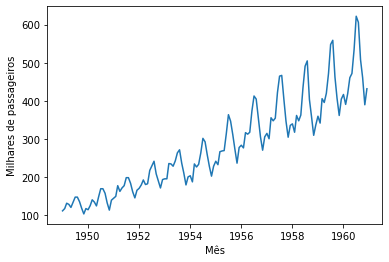

In [12]:
sns.lineplot(data=df_airline['Milhares de passageiros']);

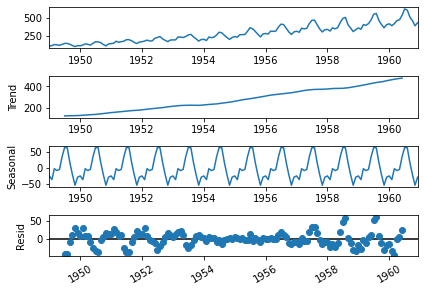

In [13]:
# faz a decomposição, com o parâmetro 
comps = seasonal_decompose(df_airline)

# plot as componentes
comps.plot()
plt.xticks(rotation=30)
plt.show()

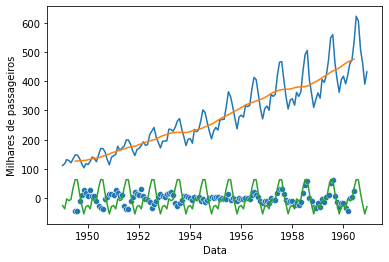

In [14]:
sns.lineplot(data=df_airline['Milhares de passageiros'])
sns.lineplot(data=comps.trend)
sns.lineplot(data=comps.seasonal)
sns.scatterplot(data=comps.resid)
plt.xlabel('Data');

### Questão 4

Ao estudar séries temporais, um fator importante para utilizar modelos preditivos é a questão de estacionaridade de uma série.

Para uma série ser estacionária, ela precisa que sua média e variância mantenham-se constante ao longo do tempo. Para o _dataset_ `airline_passengers.csv` não é estacionária devido a sua característica de sazonalidade multiplicativa (ou seja, ao longo do tempo aumenta a amplitude da série, dessa forma a variância não é constante).

Uma forma de suavizar a série temporal para que tenha um comportamento estacionário é pegarmos a diferença de variação entre os pontos. Assim vamos praticar da seguinte forma:

__A)__ Calcule a primeira diferença para os dados do _dataset_ `airlines.csv` e plote um gráfico. Podemos dizer que pode ter um comportamento estacionário?

__B)__ Faça o mesmo procedimento para a segunda diferença.

### Resolução:

**A)**

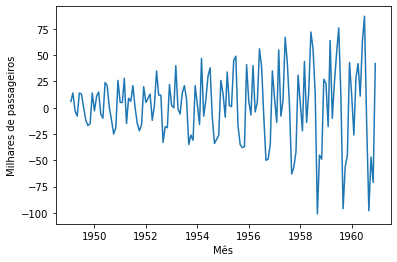

In [15]:
sns.lineplot(data=df_airline['Milhares de passageiros'].diff(1));

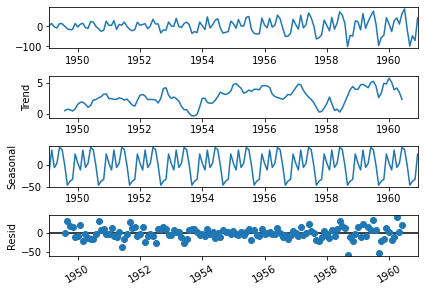

In [16]:
# faz a decomposição, com o parâmetro 
comps1 = seasonal_decompose(df_airline.diff(1).dropna())

# plot as componentes
comps1.plot()
plt.xticks(rotation=30);

**B)**

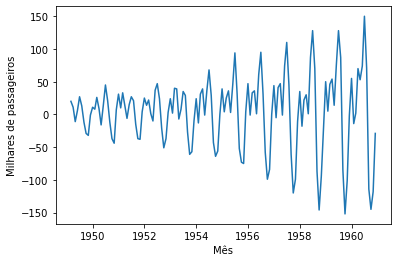

In [17]:
sns.lineplot(data=df_airline['Milhares de passageiros'].diff(2));

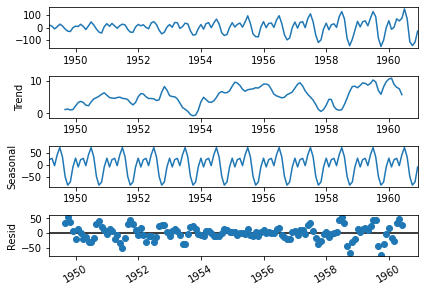

In [18]:
# faz a decomposição, com o parâmetro 
comps2 = seasonal_decompose(df_airline.diff(2).dropna())

# plot as componentes
comps2.plot()
plt.xticks(rotation=30);

### Questão 5

Plote o gráfico do fechamento das ações do _Starbucks_ disponível no _dataset_ `starbucks.csv` e um gráfico de taxa de retorno das ações.

### Resolução:

In [19]:
# Carregando e visualizando o DF
df_starbucks = pd.read_csv('starbucks.csv')
df_starbucks.head()

,Date,Close,Volume
0,2015-01-02,38.0061,6906098
1,2015-01-05,37.2781,11623796
2,2015-01-06,36.9748,7664340
3,2015-01-07,37.8848,9732554
4,2015-01-08,38.4961,13170548


In [20]:
# Ajustando o DF para trabalhar com séries temporais
df_starbucks['Date'] = pd.to_datetime(df_starbucks['Date']) # converte para formato datetime
df_starbucks = df_starbucks.set_index('Date') # coloca date como index do DF
df_starbucks.drop('Volume', axis=1, inplace=True) # deleta coluna volune
df_starbucks.columns = ['Price (US$)']
df_starbucks.head(3)

,Price (US$)
Date,
2015-01-02,38.0061
2015-01-05,37.2781
2015-01-06,36.9748


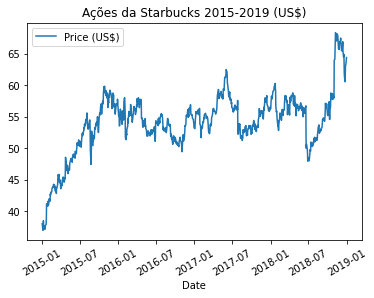

In [21]:
sns.lineplot(data=df_starbucks)
plt.xticks(rotation=30);
plt.title('Ações da Starbucks 2015-2019 (US$)');

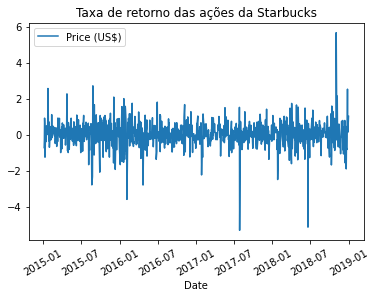

In [22]:
sns.lineplot(data=df_starbucks.diff(1))
plt.xticks(rotation=30);
plt.title('Taxa de retorno das ações da Starbucks');